# TensorFlow Tutorial: Neural Network for Classification.

### Author: Ivan Bongiorni, Data Scientist at GfK.

[LinkedIn profile](https://www.linkedin.com/in/ivan-bongiorni-b8a583164/), personal email: ivanbongiorni@gmail.com




This model is a **Neural Network for Classification** based on the University of Wisconsin's **breast cancer dataset**.

It represents a tutorial on basic **TensorFlow**.

Arguments:
1.   Download of the dataset and Dataprep,
2.   Implementation of a "simple" **feed-forward Neural Network for classification** in plain **TensorFlow**,
3.   Implementation of a **simple Batch Gradient Descent** optimization algorithm - with **dropout** and **batch normalization** as regularization techniques,
4.   Check of results using data-visualization and a Confusion Matrix.

## Import data from UCI ML repository

The purpose of this dataset is to classify breast cancer cases between **malignant** (**M**), and **benign** (**B**). Therefore, my classification network will have two output nodes.

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


bc_dat = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", sep=",", header=None)

## Some (vey basic) Dataprep

In [0]:
# First take a look at the data
bc_dat.shape

(569, 32)

In [0]:
pd.set_option('display.max_columns', None)  # this command makes pandas show all the columns

bc_dat.describe()  # columns 1 is not present, since it's not numeric

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
bc_dat.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# Let's check the dependent variable:
bc_dat.iloc[:,1].describe()

count     569
unique      2
top         B
freq      357
Name: 1, dtype: object

In [0]:
# The first column is a simple id - and must be discarded
# I then separate explanatory variables (matrix of dependent vairables DVs) and the dependent variable (vector of independent variable IV) that contains the target categories

DVs = bc_dat.iloc[:,2:31]

IV = bc_dat.iloc[:,1]
IV = pd.get_dummies(IV)  # One-Hot Encoding - required by classification algorithms

# In order to feed the data into a Neural Network, I must turn the data into numpy objects
DVs = DVs.values
IV = IV.values


In [0]:
# Scale the variables using Z-scores
# you can use sklearn's preprocessing.StandardScaler() if you prefer

def normalize(x):
    return (x - np.mean(x))/(np.std(x))

for i in range(DVs.shape[1]):
    DVs[:,i] = normalize(DVs[:,i])

## Train-Test split

In an actual ML job, you would split your dataset in **Train**, **Test**, and **Validation sets**. However, this is just an example on how to implement and run a Neural Network, so I'll skip that part and will split the data in train and test only.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DVs, IV, test_size=0.25, random_state=173)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 29) (426, 2)
(143, 29) (143, 2)


# Architecture

Since the network is not very deep, and the number of parameters is relatively small, I can employ more "demanding" (and performing) activation functions. In this case, I choose **Leaky ReLU** for hidden layers. A **softmax** function is then applied at the end, so that the attribution of classes (M/B) is shrink into probabilities.

I also applied **dropout**, that helps prevent overfitting; and **Batch normalization**, that prevents the problem of vanishing/expoloding gradients.



In [0]:
tf.reset_default_graph()


# The fully_connected function generates the layers of Neural Networks
from tensorflow.contrib.layers import fully_connected, batch_norm

# I choose the size of each layer
n_inputs = X_train.shape[1]
n_hidden1 = 30
n_hidden2 = 30
n_hidden3 = 15
n_hidden4 = 15
n_outputs = 2   # Number of outputs: "Malignant" or "Benign"

dropout_probability = 0.1

# Placeholders are kind of "empty variables" in a TF computational graph.
# I will feed the actual data through them - in the graph, they are like entry doors for my data
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None, n_outputs), name="y")


hidden1 = fully_connected(X, n_hidden1, activation_fn=tf.nn.leaky_relu, normalizer_fn=batch_norm, scope="hidden1")
hidden1 = tf.layers.dropout(hidden1, rate=dropout_probability)

hidden2 = fully_connected(hidden1, n_hidden2, activation_fn=tf.nn.leaky_relu, normalizer_fn=batch_norm, scope="hidden2")
hidden2 = tf.layers.dropout(hidden2, rate=dropout_probability)

hidden3 = fully_connected(hidden2, n_hidden3, activation_fn=tf.nn.leaky_relu, normalizer_fn=batch_norm, scope="hidden3")
hidden3 = tf.layers.dropout(hidden3, rate=dropout_probability)

hidden4 = fully_connected(hidden3, n_hidden4, activation_fn=tf.nn.leaky_relu, normalizer_fn=batch_norm, scope="hidden4")
hidden4 = tf.layers.dropout(hidden4, rate=dropout_probability)

# this is the output layer - I choose a softmax function that shrinks everything into probabilities
classes = fully_connected(hidden3, n_outputs, activation_fn=tf.nn.softmax, scope="outputs")


In [0]:
# Define a loss function - softmax cross entropy is very common for classification tasks
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=classes))


# this node of the TF graph performs the actual training process
training_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

# I define also a measure of accuracy - so that I can monitor how it changes 
correct = tf.equal(tf.argmax(classes, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


## Implementation of Batch Gradient Descent

This implementation is the simplest form of feed-forward Neural Network, based on **batch Gradient Descent**. This is Gradient Descent in its simplest form, in which the whole bunch of training data is fed into the network at each iteration.

In a following notebook I will show the implementation of **Mini-Batch Gradient Descent**.

In [0]:
# I first set a saver, in order to save the model
saver = tf.train.Saver()

# Training usually requires a higher number of epochs - this is just a toy model for explanation purposes
n_epochs = 3000

# I want to save loss, train and test accuracy at each epoch
loss_train_history = []
loss_test_history = []
accuracy_train_history = []
accuracy_test_history = []

In [0]:

# I now open a TensorFlow session, in order to execute the computational graph

with tf.Session() as sess:
    
    # the the beginning of each execution, you must initialize all variables in the computational graph
    sess.run(tf.global_variables_initializer())   # if the computational graph was a motor, this would turn it on
    
    
    for epoch in range(n_epochs):
        
        # this is the training. I feed my train data to optimize the loss function
        sess.run(training_op, feed_dict={X: X_train, y: y_train})   # I can do it because I defined the X and y placeholders above
        
        # then save loss, train and test accuracy
        # each accuracy/loss requires train/test data for its computation
        loss_train = loss.eval(feed_dict={X: X_train, y: y_train})
        loss_test = loss.eval(feed_dict={X: X_test, y: y_test})
        accuracy_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        accuracy_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        
        # then add them to the series
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)
        accuracy_train_history.append(accuracy_train)
        accuracy_test_history.append(accuracy_test)
        
        # Print the losses and monitor the training process in real time
        # In this example, I don't want to print 1000 rows (this would make the notebook unreadable), so I'll just print one every 100 epochs:
        if epoch % 100 == 0:
            print(str(epoch+1) + ". Train accuracy: " + str(accuracy_train) + "; Test accuracy: " + str(accuracy_test) + ",")
            
            # additionally, the following line saves the model every 100 iterations
            # In case the training takes very long, you want to save the model periodically, so you don't run the risk to loose your progress
            saver.save(sess, "TF_classification.ckpt")   # the "./" means "in the current directory" - classification.ckpt is my TF model
    
    # At the very end, I save the model:
    saver.save(sess, "TF_classification.ckpt")
    
    # and I store the predictions for the test set in an object:
    prediction = classes.eval(feed_dict={X: X_test, y: y_test})  # I use classes, because that's the output of the Network
    
    print()
    print("Training complete.")
#

1. Train accuracy: 0.69953054; Test accuracy: 0.6573427,
101. Train accuracy: 0.9835681; Test accuracy: 0.986014,
201. Train accuracy: 0.9929578; Test accuracy: 0.986014,
301. Train accuracy: 0.9976526; Test accuracy: 1.0,
401. Train accuracy: 1.0; Test accuracy: 0.993007,
501. Train accuracy: 1.0; Test accuracy: 0.993007,
601. Train accuracy: 1.0; Test accuracy: 0.993007,
701. Train accuracy: 1.0; Test accuracy: 0.993007,
801. Train accuracy: 1.0; Test accuracy: 0.993007,
901. Train accuracy: 1.0; Test accuracy: 0.993007,
1001. Train accuracy: 1.0; Test accuracy: 0.993007,
1101. Train accuracy: 1.0; Test accuracy: 0.993007,
1201. Train accuracy: 1.0; Test accuracy: 0.993007,
1301. Train accuracy: 1.0; Test accuracy: 0.993007,
1401. Train accuracy: 1.0; Test accuracy: 0.993007,
1501. Train accuracy: 1.0; Test accuracy: 0.993007,
1601. Train accuracy: 1.0; Test accuracy: 0.986014,
1701. Train accuracy: 1.0; Test accuracy: 0.986014,
1801. Train accuracy: 1.0; Test accuracy: 0.986014,
190

**( IMPORTANT CLARIFICATION**: *In this notebook I saved, at the end of the training process, the model's predictions of the Network on the test set in a specific object (prediction). This is done for educational purposes only, but it's not a good practice for Data Scientists. In a following notebook, I will show how to **restore a model** and use it for prediction after the training is done.* )

## Check performance visually

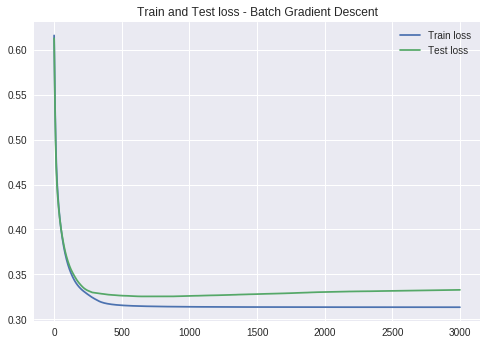

In [0]:
plt.plot(loss_train_history, label='Train loss')
plt.plot(loss_test_history, label='Test loss')
plt.title('Train and Test loss - Batch Gradient Descent')
plt.legend()
plt.show()

What can be noted is some overfitting: the training model slightly outperforms the test model. However, this difference doesn't seeem to be too high.

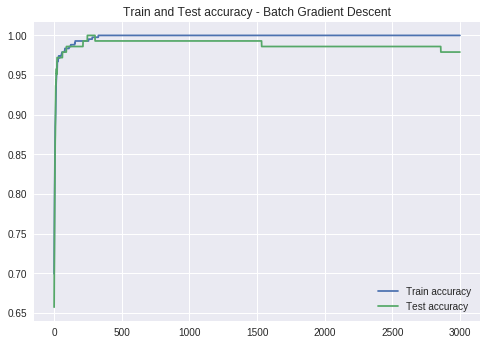

In [0]:
plt.plot(accuracy_train_history, label='Train accuracy')
plt.plot(accuracy_test_history, label='Test accuracy')
plt.title('Train and Test accuracy - Batch Gradient Descent')
plt.legend()
plt.show()

Now I'd like to check a Confusion Matrix:


In [0]:
# First, I need to transform the predictions of the Network in discrete probabilities
# that is because my prediction object contains float data. Instead, I need discrete [0 or 1] values for classification
# There are several ways
discrete_prediction = prediction

discrete_prediction = np.argmax(prediction, axis=1)   # this outputs a vector with the value of the class with the highest predicted probability [0 or 1]
discrete_testdata = np.argmax(y_test, axis=1)    # so I do it also for the test data

# plot the confusion matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(discrete_prediction, discrete_testdata)
print(CM)

[[88  2]
 [ 1 52]]


The outcome of the Confusion Matrix seems very good. Most of the cases are on the have been classified correctly, i.e.: they are on the diagonal.

We can also plot it as a heatmap, which can be very useful in case you are working with a high number of classes.

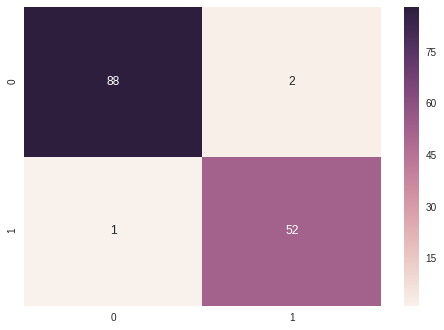

In [0]:
import seaborn

seaborn.heatmap(CM, annot=True)